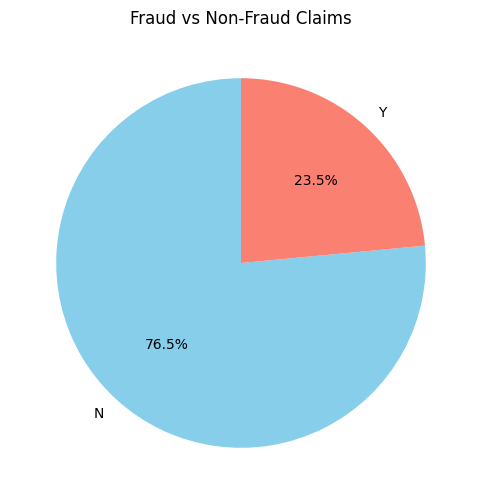

<Figure size 1400x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📌 Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3335
           1       1.00      1.00      1.00       965

    accuracy                           1.00      4300
   macro avg       1.00      1.00      1.00      4300
weighted avg       1.00      1.00      1.00      4300



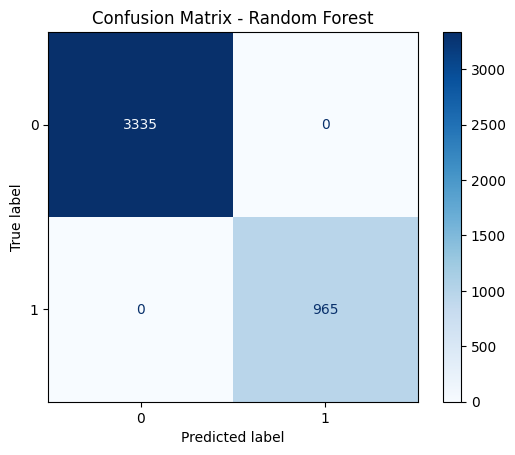

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


📌 Logistic Regression Accuracy: 0.7756
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      3335
           1       0.00      0.00      0.00       965

    accuracy                           0.78      4300
   macro avg       0.39      0.50      0.44      4300
weighted avg       0.60      0.78      0.68      4300



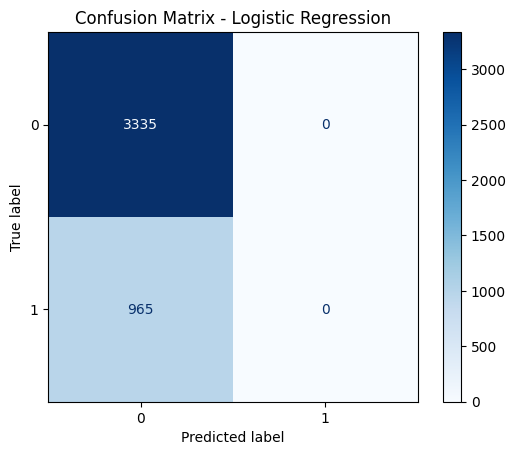


📌 Naive Bayes Accuracy: 0.7756
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      3335
           1       0.00      0.00      0.00       965

    accuracy                           0.78      4300
   macro avg       0.39      0.50      0.44      4300
weighted avg       0.60      0.78      0.68      4300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


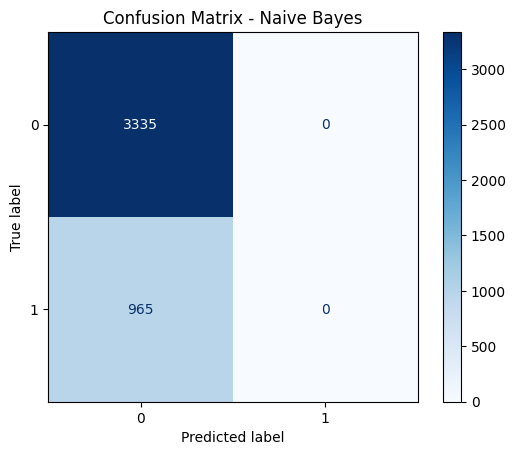

/tmp/ipython-input-5-3716410786.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')


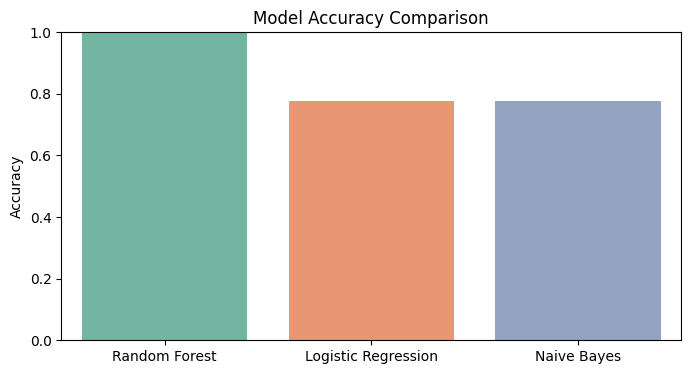


✅ Best model based on accuracy: **Random Forest**
✅ Final_Submission.csv is generated.


,Claim_ID,Fraud_Ind
0,CC00000001,0
1,CC00000002,0
2,CC00000003,1
3,CC00000004,0
4,CC00000005,0


from matplotlib import pyplot as plt
_df_4['Fraud_Ind'].plot(kind='hist', bins=20, title='Fraud_Ind')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Claim_ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Fraud_Ind'].plot(kind='line', figsize=(8, 4), title='Fraud_Ind')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Claim_ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Fraud_Ind', y='Claim_ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Load data
df_model = pd.read_csv("Auto_Insurance_Fraud_Claims_File01.csv")
df_train = pd.read_csv("Auto_Insurance_Fraud_Claims_File02.csv")
df_test = pd.read_csv("Auto_Insurance_Fraud_Claims_File03.csv")
submission = pd.read_csv("Auto_Insurance_Fraud_Claims_Results_Submission.csv")

# ============== DATA CLEANING ==============

# 1. Remove duplicates
df_model.drop_duplicates(inplace=True)

# 2. Fill missing values
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        df_model[col] = df_model[col].fillna(df_model[col].mode()[0])
    else:
        df_model[col] = df_model[col].fillna(df_model[col].median())

# 3. Remove outliers using IQR
numerical_cols = df_model.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_model = df_model[(df_model[col] >= lower) & (df_model[col] <= upper)]

# ============== EDA ==============

# Pie chart of target class
plt.figure(figsize=(6, 6))
df_model['Fraud_Ind'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Fraud vs Non-Fraud Claims')
plt.ylabel('')
plt.show()

# Bar chart of top 5 frequent claim types (example)
if 'Claim_Type' in df_model.columns:
    plt.figure(figsize=(8, 4))
    df_model['Claim_Type'].value_counts().head(5).plot(kind='bar', color='lightgreen')
    plt.title('Top 5 Claim Types')
    plt.xlabel('Claim Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# KPI Plots (example: Age, Claim Amount, Policy Holder Age, etc.)
kpi_cols = ['Age', 'Days_To_Claim', 'Claim_Amount', 'Number_of_Damages', 'Policy_Holder_Age']
kpi_cols = [col for col in kpi_cols if col in df_model.columns]

plt.figure(figsize=(14, 8))
for i, col in enumerate(kpi_cols[:5]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_model[col], kde=True, bins=30)
    plt.title(f'Distribution: {col}')
plt.tight_layout()
plt.show()

# ============== DATA PREPROCESSING ==============

# Drop non-useful columns safely
drop_cols = ['Claim_ID', 'Vehicle_Registration', 'Policy_BI', 'Policy_Start_Date', 'Policy_Expiry_Date']
df_model.drop(columns=[col for col in drop_cols if col in df_model.columns], inplace=True)

# Label Encoding for categoricals
label_encoders = {}
for col in df_model.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Prepare train-test split from cleaned data
features = df_model.drop(columns=['Fraud_Ind']).columns
X_model = df_model[features]
y_model = df_model['Fraud_Ind']

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000)
nb = GaussianNB()

voting_clf = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('nb', nb)], voting='soft')
voting_clf.fit(X_model, y_model)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Split model data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# Models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    print(f"\n📌 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    results[name] = acc

# Plotting Accuracy Comparison
plt.figure(figsize=(8, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# 🔍 Select the best model automatically
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n✅ Best model based on accuracy: **{best_model_name}**")


# ============== TESTING DATA PREPROCESSING ==============

# Function to handle unseen labels in LabelEncoder
def label_encoder_transform(le, series):
    unseen_labels = set(series) - set(le.classes_)
    if unseen_labels:
        le.classes_ = np.append(le.classes_, list(unseen_labels))
    return le.transform(series)

# Clean test data
for df in [df_train, df_test]:
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

    df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

    for col in df.select_dtypes(include=['object']).columns:
        if col in label_encoders:
            df[col] = label_encoder_transform(label_encoders[col], df[col])
        else:
            df[col] = LabelEncoder().fit_transform(df[col])

# Use best model to predict on test data
X_test = df_test[X_model.columns]
test_preds = best_model.predict(X_test)


# ============== SUBMISSION ==============

# Fill the predictions in submission file
submission['Fraud_Ind'] = test_preds
submission.to_csv("Final_Submission.csv", index=False)
print("✅ Final_Submission.csv is generated.")

# Show first few rows
submission.head()

IN Y AND N FORMAT


In [7]:
# Convert predictions from 0/1 to 'N'/'Y' (0 = Non-Fraud → 'N', 1 = Fraud → 'Y')
submission['Fraud_Ind'] = ['Y' if pred == 1 else 'N' for pred in test_preds]

# Save to CSV
submission.to_csv("Final_Submission_YN.csv", index=False)
print("✅ Final_Submission_YN.csv is generated in Y/N format.")


✅ Final_Submission_YN.csv is generated in Y/N format.


FINAL SUBMISSION CSV

In [8]:
from google.colab import files
files.download("Final_Submission_YN.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>